##Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings ('ignore')

##Import Dataset

In [ ]:
df=pd.read_csv("Churn.csv")
df

Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  ...   
1                 26        no       13.7           3         3.70  ...   
2                  0        no       12.2           5         3.29  ...   
3                  0       yes        6.6           7         1.78  ...   
4                  0       yes       10.1           3         2.73  ...   
...              ...       ...        ...         ...          ...  ...   
4995              40        no        9.9           5         2.67  ...   
4996               0        no       14.7           2         3.97  ...   
4997               0        no       13.6           4         3.67  ...   
4998               0        no        8.5           6         2.30  ...   
4999              34        no        9.3          16         2.51  ...   

      day.calls  day.charge eve.mins eve.calls  eve.charge  night.mins  \
0           110       45.07    197.4        99       16.78       244.7   
1           123       27.47    195.5       103       16.62       254.4   
2           114       41.38    121.2       110       10.30       162.6   
3            71        50.9     61.9        88        5.26       196.9   
4           113       28.34    148.3       122       12.61       186.9   
...         ...         ...      ...       ...         ...         ...   
4995        127       40.07      223       126       18.96       297.5   
4996         90       31.31    256.8        73       21.83       213.6   
4997         89        23.9    172.8       128       14.69       212.4   
4998         67        32.1    171.7        92       14.59       224.4   
4999        102          22    267.1       104       22.70       154.8   

      night.calls  night.charge  customer.calls  churn  
0              91         11.01               1     no  
1             103         11.45               1     no  
2             104          7.32               0     no  
3              89          8.86               2     no  
4             121          8.41               3     no  
...           ...           ...             ...    ...  
4995          116         13.39               2     no  
4996          113          9.61               3    yes  
4997           97          9.56               1     no  
4998           89         10.10               0     no  
4999          100          6.97               0     no  

[5000 rows x 21 columns]

# EDA (Exploratory Data Analysis)

###Data Collection

In [ ]:
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [ ]:
df.shape

(5000, 21)

###Finding all variables & understanding them

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of       Unnamed: 0 state      area.code  account.length voice.plan  \
0              1    KS  area_code_415             128        yes   
1              2    OH  area_code_415             107        yes   
2              3    NJ  area_code_415             137         no   
3              4    OH  area_code_408              84         no   
4              5    OK  area_code_415              75         no   
...          ...   ...            ...             ...        ...   
4995        4996    HI  area_code_408              50        yes   
4996        4997    WV  area_code_415             152         no   
4997        4998    DC  area_code_415              61         no   
4998        4999    DC  area_code_510             109         no   
4999        5000    VT  area_code_415              86        yes   

      voice.messages intl.plan  intl.mins  intl.calls  intl.charge  ...  \
0                 25        no       10.0           3         2.70  

In [ ]:
df.dtypes

Unnamed: 0          int64
state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [ ]:
df.describe()

Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls    eve.calls   eve.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.771196   180.288900   100.029400   100.191000    17.054322   
std       0.745514    53.894699    19.831197    19.826496     4.296843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.300000   143.700000    87.000000    87.000000    14.140000   
50%       2.780000   180.100000   100.000000   100.000000    17.090000   
75%       3.240000   216.200000   113.000000   114.000000    19.900000   
max       5.400000   351.500000   165.000000   170.000000    30.910000   

        night.mins  night.calls  night.charge  customer.calls  
count  5000.000000  5000.000000   5000.000000     5000.000000  
mean    200.391620    99.919200      9.017732        1.570400  
std      50.527789    19.958686      2.273763        1.306363  
min       0.000000     0.000000      0.000000        0.000000  
25%     166.900000    87.000000      7.510000        1.000000  
50%     200.400000   100.000000      9.020000        1.000000  
75%     234.700000   113.000000     10.560000        2.000000  
max     395.000000   175.000000     17.770000        9.000000

###Cleaning the dataset

In [ ]:
# Finding duplicate values
df.duplicated().sum()

0

In [ ]:
# Finding missing values
print("There are {} missing values in the data.".format(df.isna().sum().sum())) 

There are 0 missing values in the data.


In [ ]:
df1=df.dropna()

In [ ]:
df1.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [ ]:
df2=df1.drop('Unnamed: 0',axis=1)
df2

state      area.code  account.length voice.plan  voice.messages  \
0       KS  area_code_415             128        yes              25   
1       OH  area_code_415             107        yes              26   
2       NJ  area_code_415             137         no               0   
3       OH  area_code_408              84         no               0   
4       OK  area_code_415              75         no               0   
...    ...            ...             ...        ...             ...   
4995    HI  area_code_408              50        yes              40   
4996    WV  area_code_415             152         no               0   
4997    DC  area_code_415              61         no               0   
4998    DC  area_code_510             109         no               0   
4999    VT  area_code_415              86        yes              34   

     intl.plan  intl.mins  intl.calls  intl.charge  day.mins  day.calls  \
0           no       10.0           3         2.70     265.1        110   
1           no       13.7           3         3.70     161.6        123   
2           no       12.2           5         3.29     243.4        114   
3          yes        6.6           7         1.78     299.4         71   
4          yes       10.1           3         2.73     166.7        113   
...        ...        ...         ...          ...       ...        ...   
4995        no        9.9           5         2.67     235.7        127   
4996        no       14.7           2         3.97     184.2         90   
4997        no       13.6           4         3.67     140.6         89   
4998        no        8.5           6         2.30     188.8         67   
4999        no        9.3          16         2.51     129.4        102   

     day.charge eve.mins  eve.calls  eve.charge  night.mins  night.calls  \
0         45.07    197.4         99       16.78       244.7           91   
1         27.47    195.5        103       16.62       254.4          103   
2         41.38    121.2        110       10.30       162.6          104   
3          50.9     61.9         88        5.26       196.9           89   
4         28.34    148.3        122       12.61       186.9          121   
...         ...      ...        ...         ...         ...          ...   
4995      40.07      223        126       18.96       297.5          116   
4996      31.31    256.8         73       21.83       213.6          113   
4997       23.9    172.8        128       14.69       212.4           97   
4998       32.1    171.7         92       14.59       224.4           89   
4999         22    267.1        104       22.70       154.8          100   

      night.charge  customer.calls churn  
0            11.01               1    no  
1            11.45               1    no  
2             7.32               0    no  
3             8.86               2    no  
4             8.41               3    no  
...            ...             ...   ...  
4995         13.39               2    no  
4996          9.61               3   yes  
4997          9.56               1    no  
4998         10.10               0    no  
4999          6.97               0    no  

[5000 rows x 20 columns]

###Converting Numerical Variables to same datatype

In [ ]:
df2.dtypes

state              object
area.code          object
account.length      int64
voice.plan         object
voice.messages      int64
intl.plan          object
intl.mins         float64
intl.calls          int64
intl.charge       float64
day.mins          float64
day.calls           int64
day.charge         object
eve.mins           object
eve.calls           int64
eve.charge        float64
night.mins        float64
night.calls         int64
night.charge      float64
customer.calls      int64
churn              object
dtype: object

In [ ]:
df2['intl.charge']=df2['intl.charge'].astype(int)

In [ ]:
df2['intl.mins']=df2['intl.mins'].astype(int)

In [ ]:
df2['day.mins']=df2['day.mins'].astype(int)

In [ ]:
df2['eve.charge']=df2['eve.charge'].astype(int)

In [ ]:
df2['night.charge']=df2['night.charge'].astype(int)

In [ ]:
df2['night.mins']=df2['night.mins'].astype(int)

In [ ]:
df2['eve.mins']=df2['night.mins'].astype(int)

In [ ]:
df2['day.charge']=df2['night.mins'].astype(int)

In [ ]:
df2.dtypes

state             object
area.code         object
account.length     int64
voice.plan        object
voice.messages     int64
intl.plan         object
intl.mins          int64
intl.calls         int64
intl.charge        int64
day.mins           int64
day.calls          int64
day.charge         int64
eve.mins           int64
eve.calls          int64
eve.charge         int64
night.mins         int64
night.calls        int64
night.charge       int64
customer.calls     int64
churn             object
dtype: object

In [ ]:
df2.head()

state      area.code  account.length voice.plan  voice.messages intl.plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   
2    NJ  area_code_415             137         no               0        no   
3    OH  area_code_408              84         no               0       yes   
4    OK  area_code_415              75         no               0       yes   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls  day.charge  \
0         10           3            2       265        110         244   
1         13           3            3       161        123         254   
2         12           5            3       243        114         162   
3          6           7            1       299         71         196   
4         10           3            2       166        113         186   

   eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0       244         99          16         244           91            11   
1       254        103          16         254          103            11   
2       162        110          10         162          104             7   
3       196         88           5         196           89             8   
4       186        122          12         186          121             8   

   customer.calls churn  
0               1    no  
1               1    no  
2               0    no  
3               2    no  
4               3    no

In [ ]:
# Categorical Features
cat_features=[i for i in df2.columns if df2.dtypes[i]=='object']
cat_features

['state', 'area.code', 'voice.plan', 'intl.plan', 'churn']

In [ ]:
# Numerical Features
num_features=[i for i in df2.columns if df2.dtypes[i]=='int']
num_features

['account.length',
 'voice.messages',
 'intl.mins',
 'intl.calls',
 'intl.charge',
 'day.mins',
 'day.calls',
 'day.charge',
 'eve.mins',
 'eve.calls',
 'eve.charge',
 'night.mins',
 'night.calls',
 'night.charge',
 'customer.calls']

# Visualizations

###Visualization of target feature on unique values

In [ ]:
# Checking unique values for target varible
df2['churn'].value_counts()

no     4293
yes     707
Name: churn, dtype: int64

yes: 4293, yes: 707


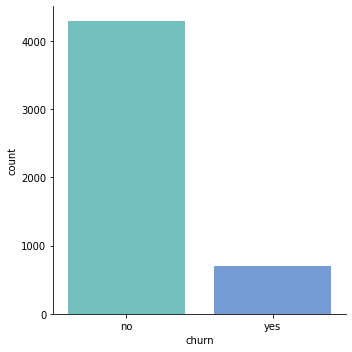

In [ ]:
yes = df[df['churn']=='yes'].shape[0]
no = df[df['churn']=='no'].shape[0]
print("yes: " + str(no) + ", yes: " + str(yes))
sb.catplot(data=df, x="churn", kind="count", palette="winter_r", alpha=.6)
plt.show()

**Report : The target feature is highly imbalanced**

In [ ]:
df2['intl.plan'].value_counts()

no     4527
yes     473
Name: intl.plan, dtype: int64

yes: 4527, yes: 473


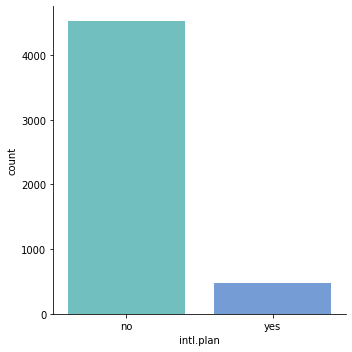

In [ ]:
yes = df[df['intl.plan']=='yes'].shape[0]
no = df[df['intl.plan']=='no'].shape[0]
print("yes: " + str(no) + ", yes: " + str(yes))
sb.catplot(data=df, x="intl.plan", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [ ]:
df2['voice.plan'].value_counts()

no     3677
yes    1323
Name: voice.plan, dtype: int64

yes: 3677, yes: 1323


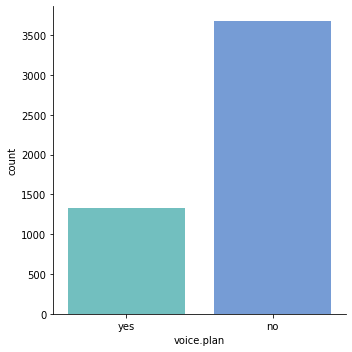

In [ ]:
yes = df[df['voice.plan']=='yes'].shape[0]
no = df[df['voice.plan']=='no'].shape[0]
print("yes: " + str(no) + ", yes: " + str(yes))
sb.catplot(data=df, x="voice.plan", kind="count", palette="winter_r", alpha=.6)
plt.show()

###Visulization of Categorical features

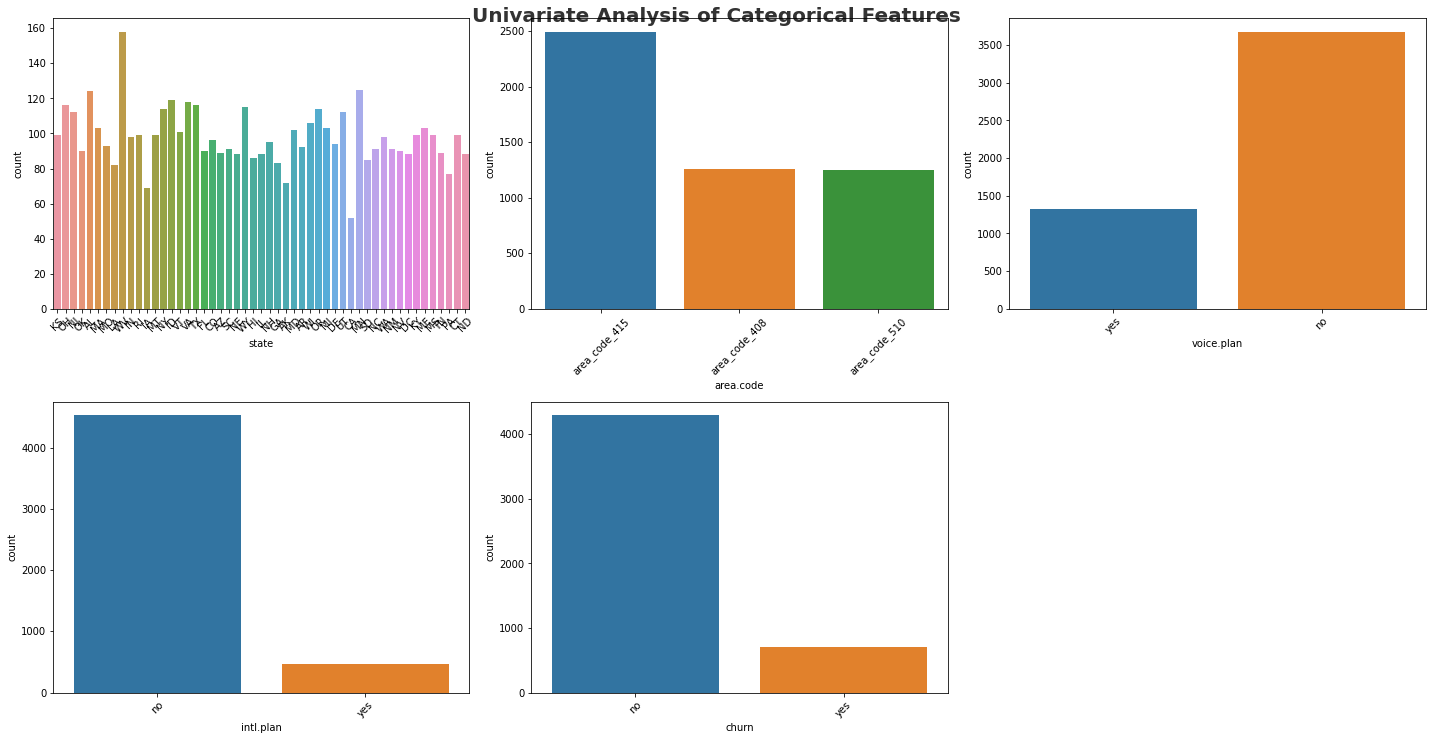

In [ ]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_features)):
    plt.subplot(3, 3, i+1)
    sb.countplot(x=df2[cat_features[i]])
    plt.xlabel(cat_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

###Visualization of numerical features

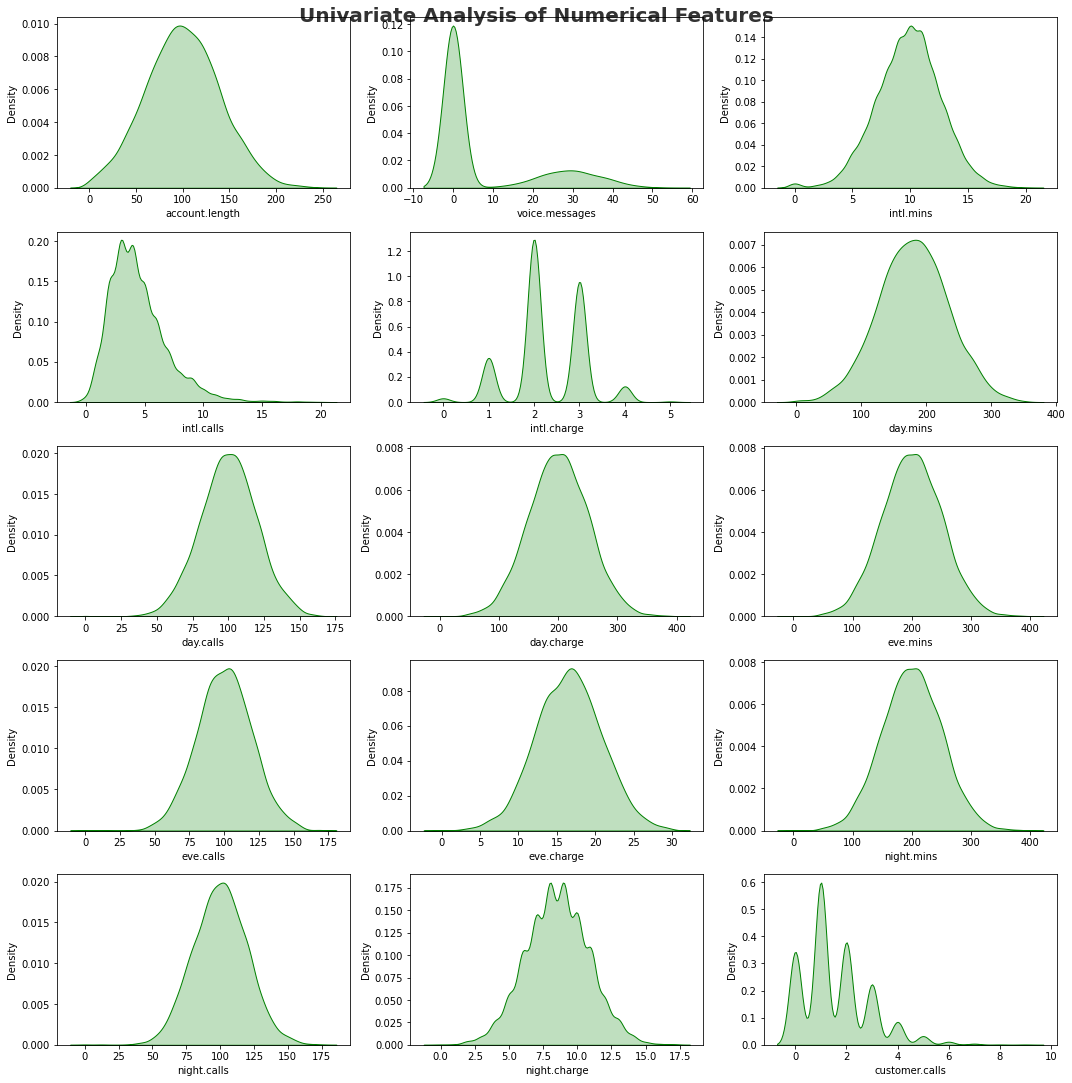

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_features)):
    plt.subplot(5, 3, i+1)
    sb.kdeplot(x=df2[num_features[i]],shade=True, color='g')
    plt.xlabel(num_features[i])
    plt.tight_layout()

In [ ]:
# unique values of state column
df2['state'].nunique()

51

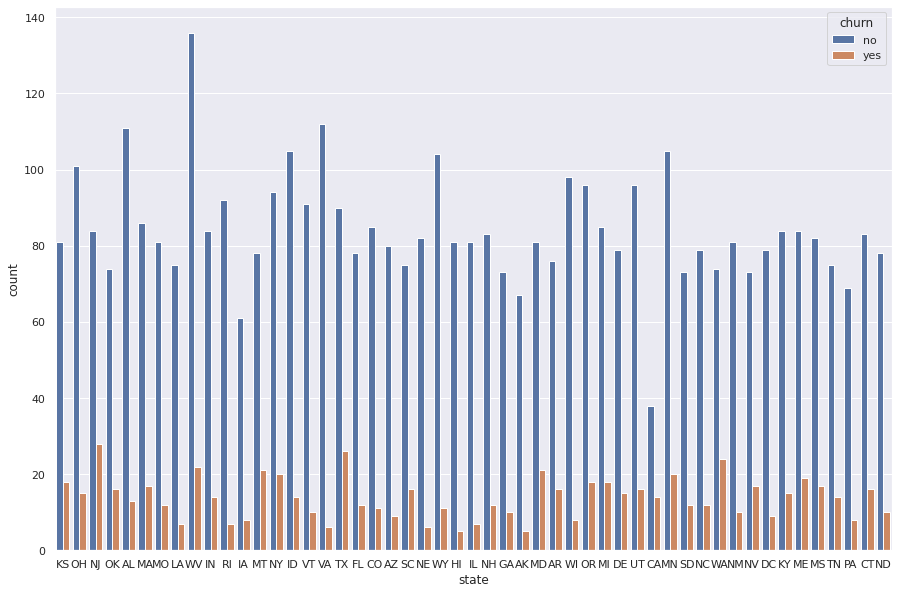

In [ ]:
# Visualization by using count plot
sb.set(style="darkgrid")
plt.figure(figsize=(15,10))
sb.countplot(x='state',hue='churn',data=df2)
plt.show()

**Report : as we can see, WV has the highest and CA has lowest Churn Rate**

###Identifying Correlated variables

In [ ]:
df2.corr()

account.length  voice.messages  intl.mins  intl.calls  \
account.length        1.000000       -0.014575  -0.001120    0.014277   
voice.messages       -0.014575        1.000000   0.002795    0.000124   
intl.mins            -0.001120        0.002795   1.000000    0.017169   
intl.calls            0.014277        0.000124   0.017169    1.000000   
intl.charge          -0.002044        0.012880   0.925932    0.005401   
day.mins             -0.000995        0.005298  -0.020057   -0.001447   
day.calls             0.028240        0.000883   0.015195    0.010893   
day.charge            0.000754        0.005505  -0.006518   -0.017261   
eve.mins              0.000754        0.005505  -0.006518   -0.017261   
eve.calls             0.009143       -0.003954  -0.008596    0.005574   
eve.charge           -0.009000        0.019608   0.003005    0.010455   
night.mins            0.000754        0.005505  -0.006518   -0.017261   
night.calls          -0.007825        0.002676   0.001910   -0.000156   
night.charge          0.000336        0.003583  -0.007520   -0.015499   
customer.calls       -0.001445       -0.007086  -0.011470   -0.019147   

                intl.charge  day.mins  day.calls  day.charge  eve.mins  \
account.length    -0.002044 -0.000995   0.028240    0.000754  0.000754   
voice.messages     0.012880  0.005298   0.000883    0.005505  0.005505   
intl.mins          0.925932 -0.020057   0.015195   -0.006518 -0.006518   
intl.calls         0.005401 -0.001447   0.010893   -0.017261 -0.017261   
intl.charge        1.000000 -0.019283   0.014447   -0.001492 -0.001492   
day.mins          -0.019283  1.000000   0.002045    0.011809  0.011809   
day.calls          0.014447  0.002045   1.000000    0.002753  0.002753   
day.charge        -0.001492  0.011809   0.002753    1.000000  1.000000   
eve.mins          -0.001492  0.011809   0.002753    1.000000  1.000000   
eve.calls         -0.011348  0.008141   0.003754    0.001778  0.001778   
eve.charge         0.008195 -0.010394  -0.002041   -0.014450 -0.014450   
night.mins        -0.001492  0.011809   0.002753    1.000000  1.000000   
night.calls        0.012884  0.004224  -0.008308    0.026913  0.026913   
night.charge      -0.002583  0.011310   0.002493    0.992109  0.992109   
customer.calls    -0.018509  0.002782  -0.010739   -0.008653 -0.008653   

                eve.calls  eve.charge  night.mins  night.calls  night.charge  \
account.length   0.009143   -0.009000    0.000754    -0.007825      0.000336   
voice.messages  -0.003954    0.019608    0.005505     0.002676      0.003583   
intl.mins       -0.008596    0.003005   -0.006518     0.001910     -0.007520   
intl.calls       0.005574    0.010455   -0.017261    -0.000156     -0.015499   
intl.charge     -0.011348    0.008195   -0.001492     0.012884     -0.002583   
day.mins         0.008141   -0.010394    0.011809     0.004224      0.011310   
day.calls        0.003754   -0.002041    0.002753    -0.008308      0.002493   
day.charge       0.001778   -0.014450    1.000000     0.026913      0.992109   
eve.mins         0.001778   -0.014450    1.000000     0.026913      0.992109   
eve.calls        1.000000    0.002159    0.001778    -0.013682      0.000243   
eve.charge       0.002159    1.000000   -0.014450     0.012167     -0.013165   
night.mins       0.001778   -0.014450    1.000000     0.026913      0.992109   
night.calls     -0.013682    0.012167    0.026913     1.000000      0.027020   
night.charge     0.000243   -0.013165    0.992109     0.027020      1.000000   
customer.calls   0.006235   -0.014245   -0.008653    -0.008283     -0.011130   

                customer.calls  
account.length       -0.001445  
voice.messages       -0.007086  
intl.mins            -0.011470  
intl.calls           -0.019147  
intl.charge          -0.018509  
day.mins              0.002782  
day.calls            -0.010739  
day.charge           -0.008653  
eve.mins             -0.008653  
eve.calls             0.006235  
eve.charge        

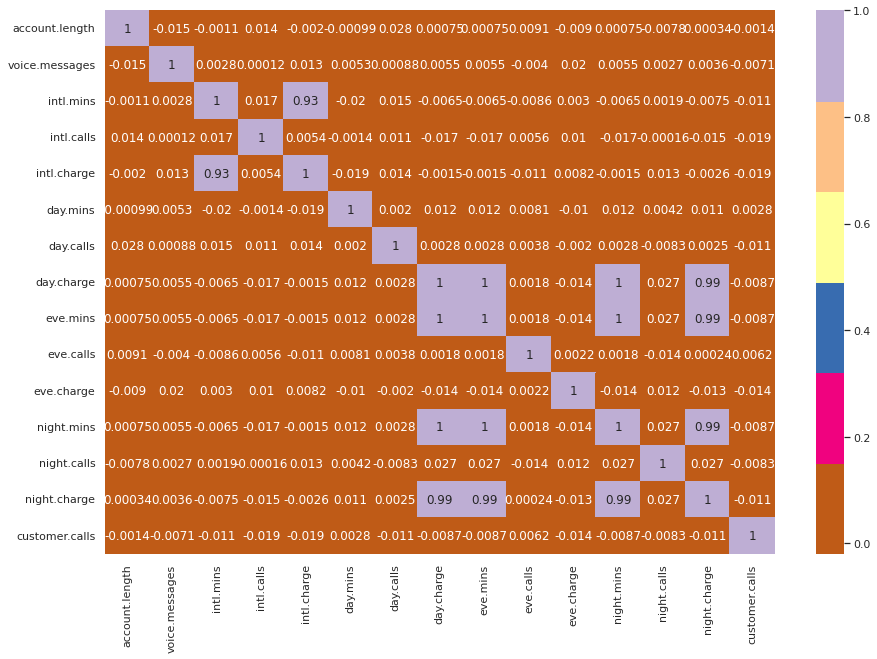

In [ ]:
# Checking Multicollinearity in Numerical features (HeatMap)
plt.figure(figsize = (15,10))
sb.heatmap(df2.corr(), cmap=sb.color_palette('Accent_r'), annot=True)
plt.show()

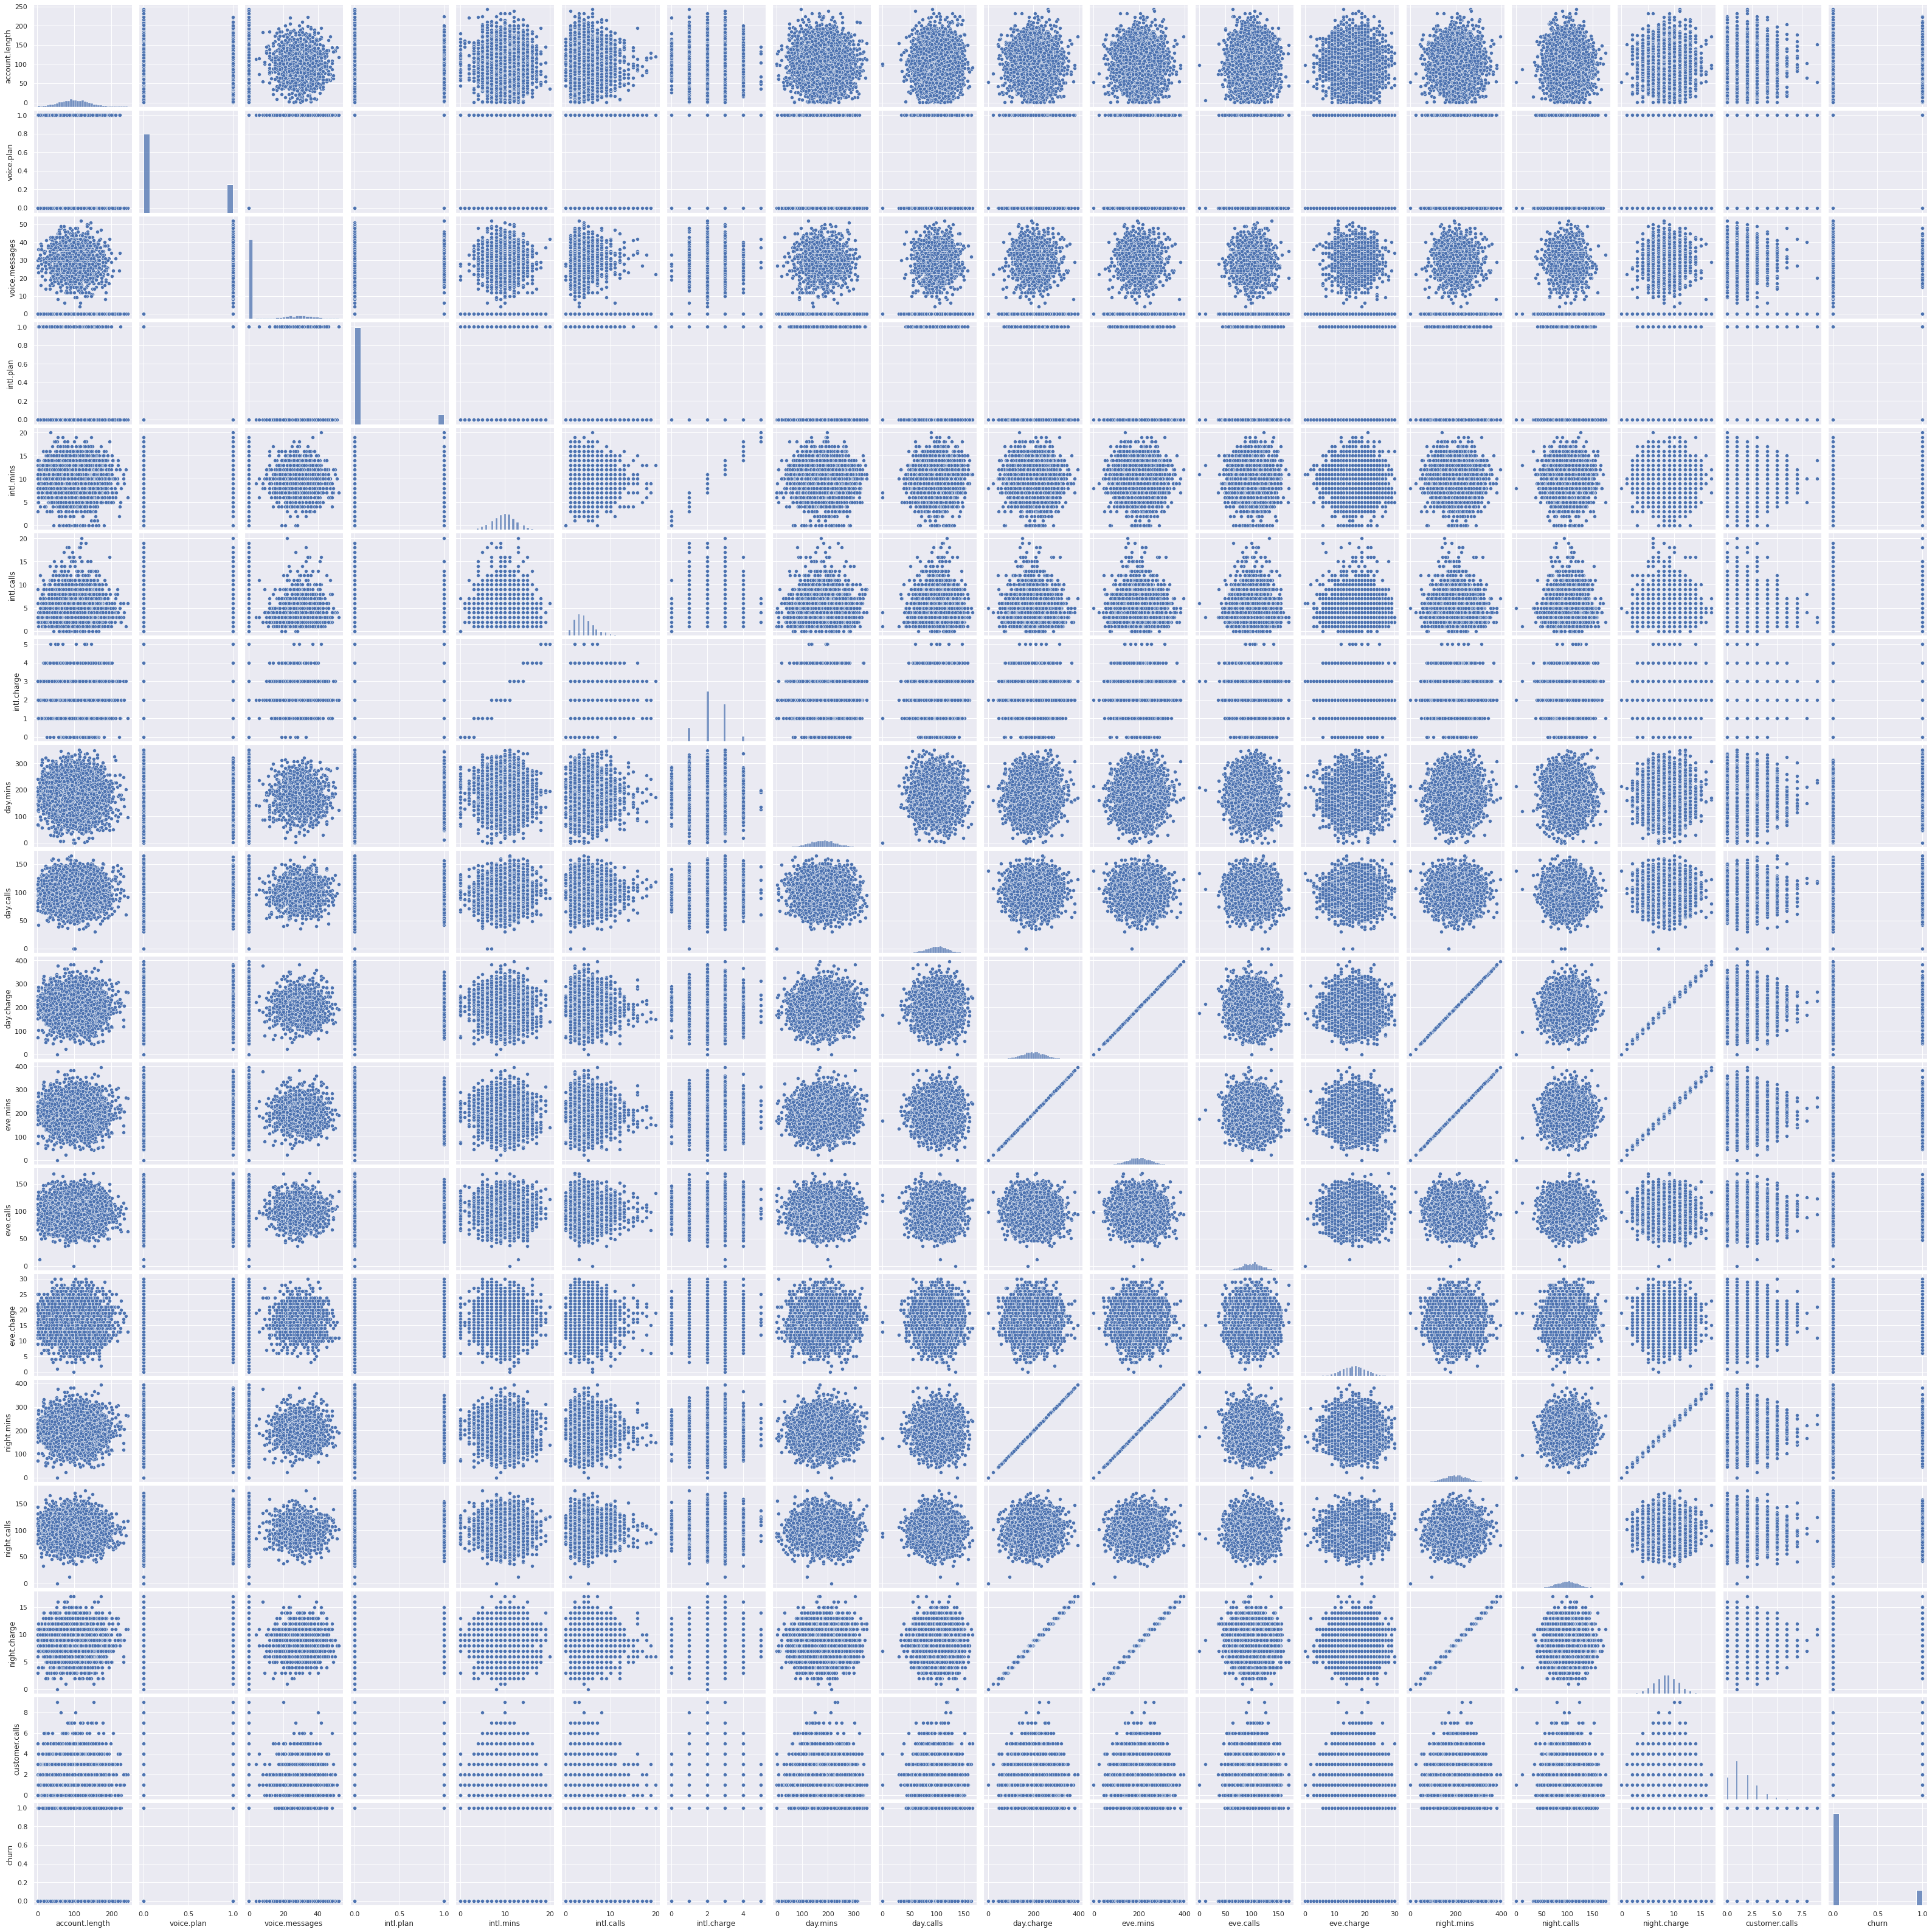

In [93]:
# Pairplot 
sb.pairplot(df2)

### Top 10 International calls

In [ ]:
Top_10_state = df2['state'].value_counts().head(10)
Top_10_state

WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
Name: state, dtype: int64

In [ ]:
Top_10_state_intlcalls =Top_10_state.index
Top_10_state_intlcalls

Index(['WV', 'MN', 'AL', 'ID', 'VA', 'OH', 'TX', 'WY', 'NY', 'OR'], dtype='object')

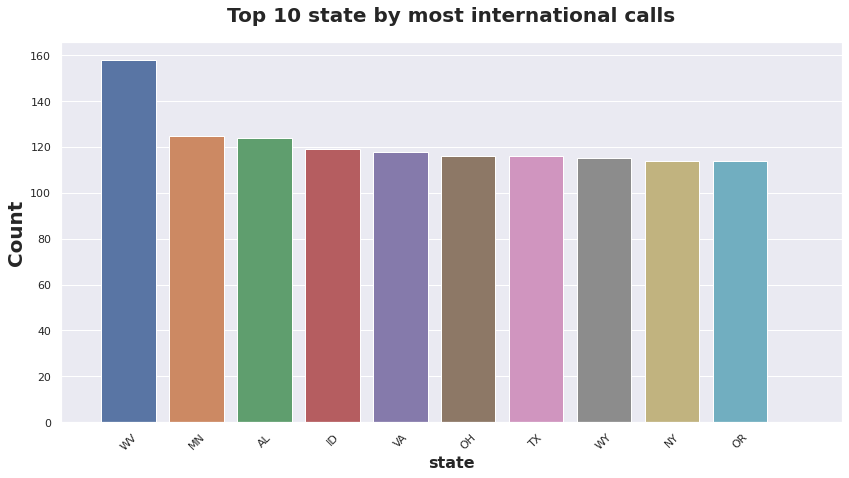

In [ ]:
plt.subplots(figsize=(14,7))
sb.countplot(x="state", data=df2,order = Top_10_state_intlcalls)
plt.title("Top 10 state by most international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("state", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

**Report : State WV has the most international calls among all the other states**

In [ ]:
International_details = df2.groupby('state')['intl.mins', 'intl.calls', 'intl.charge'].sum().reset_index()
International_details

state  intl.mins  intl.calls  intl.charge
0     AK        678         335          159
1     AL       1243         558          293
2     AR        894         437          209
3     AZ        899         423          215
4     CA        496         226          117
5     CO        897         416          210
6     CT        983         403          231
7     DC        883         349          211
8     DE        958         397          226
9     FL        877         382          202
10    GA        831         358          196
11    HI        851         420          201
12    IA        641         291          148
13    ID       1203         553          285
14    IL        844         347          195
15    IN        938         400          219
16    KS       1037         437          243
17    KY       1018         405          240
18    LA        751         378          171
19    MA        977         475          226
20    MD       1033         452          240
21    ME        984         449          228
22    MI       1068         491          251
23    MN       1228         526          286
24    MO        873         465          206
25    MS       1002         429          232
26    MT        999         452          232
27    NC        870         400          200
28    ND        851         415          204
29    NE        884         361          205
30    NH        928         423          214
31    NJ       1140         511          272
32    NM        906         422          210
33    NV        880         391          200
34    NY       1074         519          256
35    OH       1143         494          271
36    OK        904         419          211
37    OR       1128         483          266
38    PA        759         309          174
39    RI        958         433          226
40    SC        839         381          198
41    SD        818         393          185
42    TN        888         395          207
43    TX       1153         492          263
44    UT       1071         515          248
45    VA       1164         564          273
46    VT        982         486          228
47    WA        926         450          217
48    WI       1001         431          230
49    WV       1578         701          373
50    WY       1150         534          264

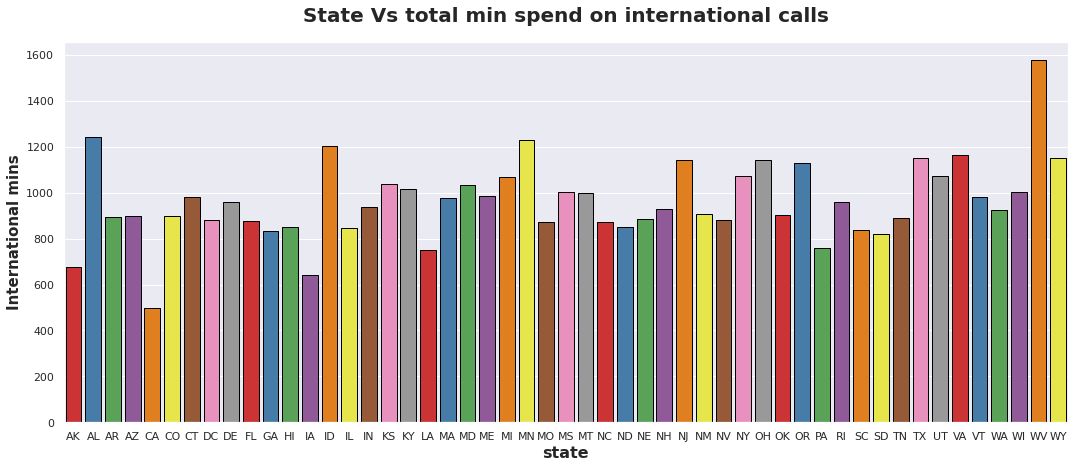

In [ ]:
plt.subplots(figsize=(18,7))
sb.barplot(x=International_details.state, y=International_details['intl.mins'],ec = "black",palette="Set1")
plt.title("State Vs total min spend on international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("International mins", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)
plt.show()

**Report : State WV has spent 1600 min above of international calls**

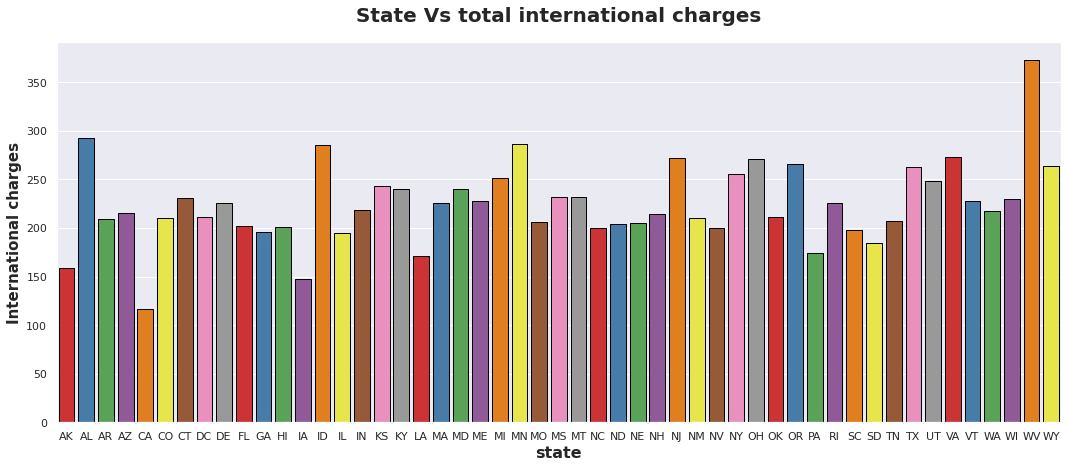

In [ ]:
plt.subplots(figsize=(18,7))
sb.barplot(x=International_details.state, y=International_details['intl.charge'],ec = "black",palette="Set1")
plt.title("State Vs total international charges", weight="bold",fontsize=20, pad=20)
plt.ylabel("International charges", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)
plt.show()

**Report : State WV has 400 above International charges**

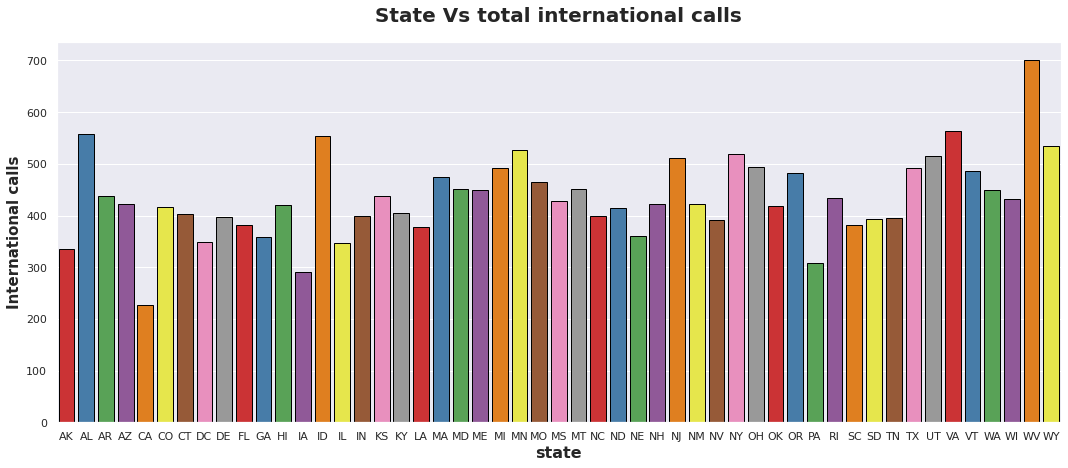

In [ ]:
plt.subplots(figsize=(18,7))
sb.barplot(x=International_details.state, y=International_details['intl.calls'],ec = "black",palette="Set1")
plt.title("State Vs total international calls", weight="bold",fontsize=20, pad=20)
plt.ylabel("International calls", weight="bold", fontsize=15)
plt.xlabel("state", weight="bold", fontsize=16)
plt.show()

**Report : State WV has spent 700 international calls among all states**

# Splitting the data into train and test to avoid overfitting

In [ ]:
df2['voice.plan'] = np.where(df2['voice.plan'].str.contains("yes"), 1, 0)
df2['intl.plan'] = np.where(df2['intl.plan'].str.contains("yes"), 1, 0)
df2['churn'] = np.where(df2['churn'].str.contains("yes"), 1, 0)

In [ ]:
X=df2.drop(['state','area.code','churn'], axis='columns')
Y=df2['churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# Feature Selection

### 1) Performing mutual info regression

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.        , 0.02476007, 0.        , 0.02493514, 0.        ,
       0.        , 0.        , 0.02930446, 0.        , 0.        ,
       0.04008795, 0.        , 0.00732727, 0.        , 0.        ,
       0.00269758, 0.04610586])

In [ ]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

customer.calls    0.046106
eve.mins          0.040088
day.mins          0.029304
intl.plan         0.024935
voice.plan        0.024760
eve.charge        0.007327
night.charge      0.002698
night.calls       0.000000
night.mins        0.000000
eve.calls         0.000000
account.length    0.000000
day.charge        0.000000
intl.charge       0.000000
intl.calls        0.000000
intl.mins         0.000000
voice.messages    0.000000
day.calls         0.000000
dtype: float64

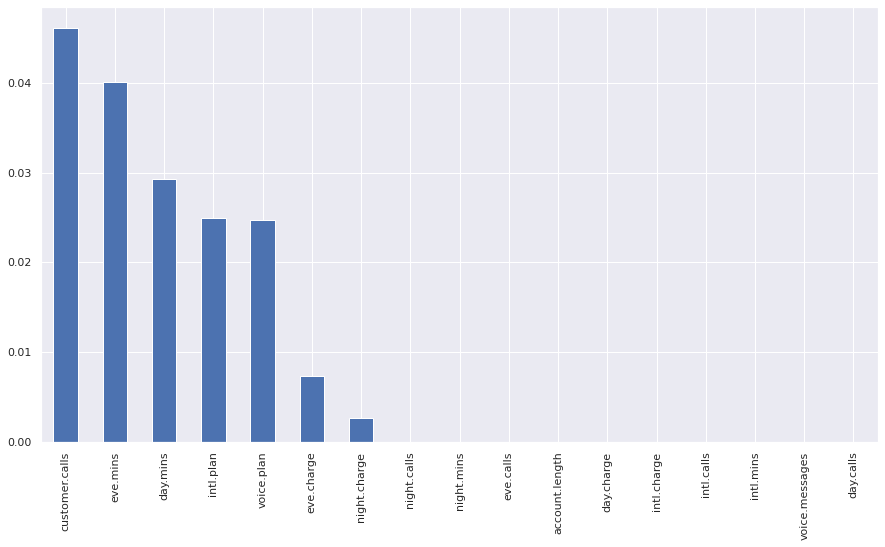

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,8))

### 2) Performing Decision Tree Classifier Using Entropy Criteria (C5.0)

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# Pruning the Decision Tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

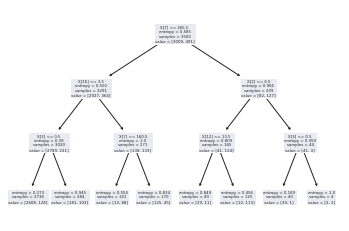

In [ ]:
# PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

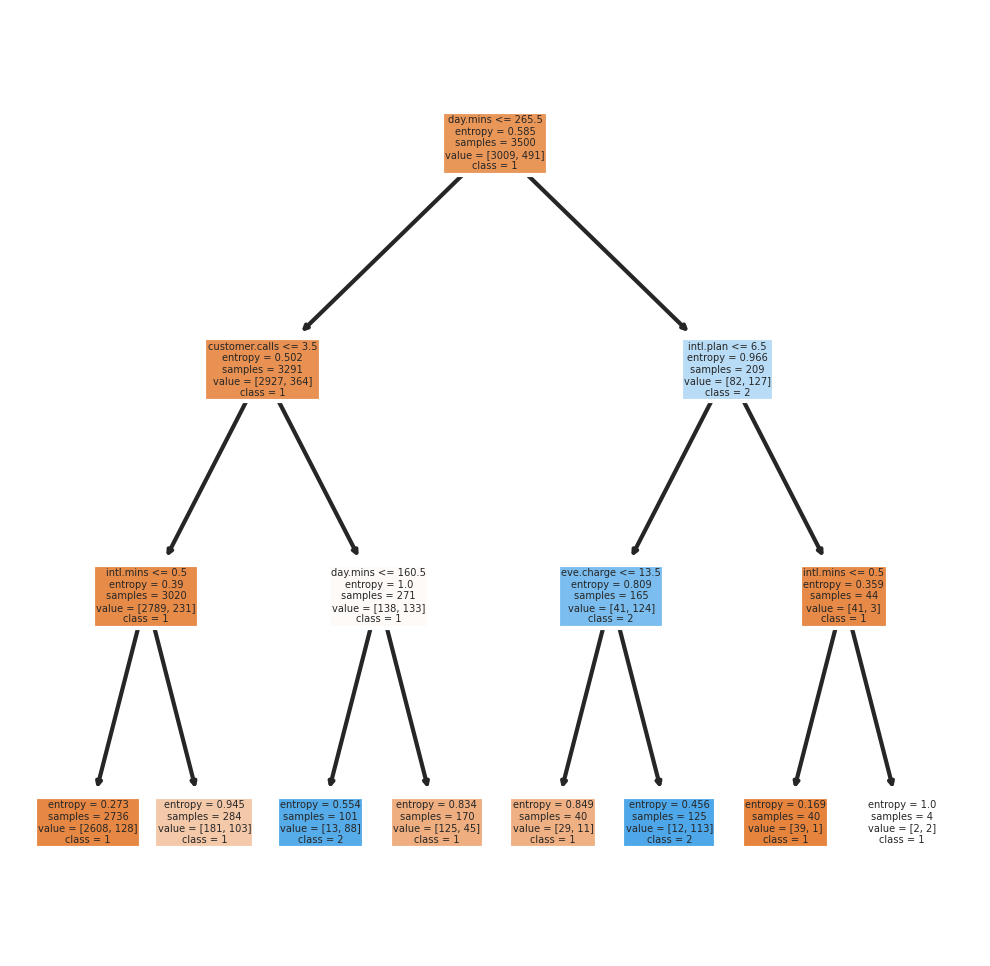

In [ ]:
fn=['voice.plan ','voice.messages','intl.plan','intl.mins','intl.mins','intl.calls','intl.charge',
    'day.mins','day.calls','day.charge','eve.mins','eve.calls','eve.charge','night.mins','night.calls','night.charge','customer.calls']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [ ]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_7 <= 265.50
|   |--- feature_16 <= 3.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|   |--- feature_16 >  3.50
|   |   |--- feature_7 <= 160.50
|   |   |   |--- class: 1
|   |   |--- feature_7 >  160.50
|   |   |   |--- class: 0
|--- feature_7 >  265.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_12 <= 13.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  13.50
|   |   |   |--- class: 1
|   |--- feature_2 >  6.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0



In [ ]:
model.feature_importances_

array([0.        , 0.        , 0.07179262, 0.22863668, 0.        ,
       0.        , 0.        , 0.36450718, 0.        , 0.        ,
       0.        , 0.        , 0.05790315, 0.        , 0.        ,
       0.        , 0.27716037])

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

day.mins          0.364507
customer.calls    0.277160
intl.mins         0.228637
intl.plan         0.071793
eve.charge        0.057903
eve.mins          0.000000
night.charge      0.000000
night.calls       0.000000
night.mins        0.000000
eve.calls         0.000000
voice.plan        0.000000
day.charge        0.000000
voice.messages    0.000000
intl.charge       0.000000
intl.calls        0.000000
intl.mins         0.000000
day.calls         0.000000
dtype: float64

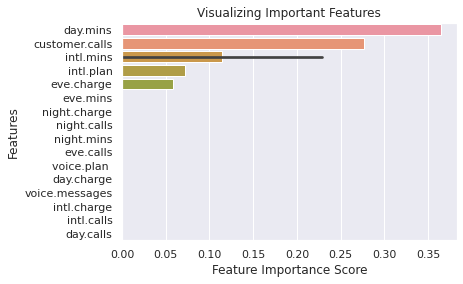

In [ ]:
# Creating a bar plot
sb.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    1409
1      91
dtype: int64

In [ ]:
# Accuracy 
np.mean(preds==y_test)

0.9046666666666666

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Converting categorical data into numerical data

In [ ]:
# Encoding categorical columns
df3=pd.get_dummies(df2,columns=['state','area.code'])
df3

account.length  voice.plan  voice.messages  intl.plan  intl.mins  \
0                128           1              25          0         10   
1                107           1              26          0         13   
2                137           0               0          0         12   
3                 84           0               0          1          6   
4                 75           0               0          1         10   
...              ...         ...             ...        ...        ...   
4995              50           1              40          0          9   
4996             152           0               0          0         14   
4997              61           0               0          0         13   
4998             109           0               0          0          8   
4999              86           1              34          0          9   

      intl.calls  intl.charge  day.mins  day.calls  day.charge  ...  state_UT  \
0              3            2       265        110         244  ...         0   
1              3            3       161        123         254  ...         0   
2              5            3       243        114         162  ...         0   
3              7            1       299         71         196  ...         0   
4              3            2       166        113         186  ...         0   
...          ...          ...       ...        ...         ...  ...       ...   
4995           5            2       235        127         297  ...         0   
4996           2            3       184         90         213  ...         0   
4997           4            3       140         89         212  ...         0   
4998           6            2       188         67         224  ...         0   
4999          16            2       129        102         154  ...         0   

      state_VA  state_VT  state_WA  state_WI  state_WV  state_WY  \
0            0         0         0         0         0         0   
1            0         0         0         0         0         0   
2            0         0         0         0         0         0   
3            0         0         0         0         0         0   
4            0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...   
4995         0         0         0         0         0         0   
4996         0         0         0         0         1         0   
4997         0         0         0         0         0         0   
4998         0         0         0         0         0         0   
4999         0         1         0         0         0         0   

      area.code_area_code_408  area.code_area_code_415  \
0                           0                        1   
1                           0                        1   
2                           0                        1   
3                           1                        0   
4                           0                        1   
...                       ...                      ...   
4995                        1                        0   
4996                        0                        1   
4997                        0                        1   
4998                        0                        0   
4999                        0                        1   

      area.code_area_code_510  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
4995                        0  
4996                        0  
4997                        0  
4998                        1  
4999                        0  

[5000 rows x 72 columns]

**Since all are converted to numerical variables, there are no continuos/discrete/categorical variables**

# SMOTE for Imbalanced Data

**How to handle Imbalance Data ?**

Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.

SMOTE: Synthetic Minority Oversampling Technique

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.

Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

In [ ]:
x=pd.concat([df3.iloc[:,0:17],df3.iloc[:,18:]],axis=1)
y=df3['churn']

In [ ]:
# Before balancing
y.value_counts()

0    4293
1     707
Name: churn, dtype: int64

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# After balancing
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy ='minority')
X_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()

0    4293
1    4293
Name: churn, dtype: int64

# Model Building

### Scaling down the data to keep the values in same range

In [ ]:
# standardizing the data
# standardizing can help features arrive in more digestible form for these algorithms
scaler=preprocessing.StandardScaler()
a=scaler.fit_transform(x)
a

array([[ 0.69894149,  1.66712012,  1.27314513, ..., -0.58012157,
         1.002002  , -0.57611859],
       [ 0.16984882,  1.66712012,  1.3469729 , ..., -0.58012157,
         1.002002  , -0.57611859],
       [ 0.92569549, -0.5998368 , -0.57254912, ..., -0.58012157,
         1.002002  , -0.57611859],
       ...,
       [-0.98911606, -0.5998368 , -0.57254912, ..., -0.58012157,
         1.002002  , -0.57611859],
       [ 0.2202386 , -0.5998368 , -0.57254912, ..., -0.58012157,
        -0.998002  ,  1.73575375],
       [-0.35924384,  1.66712012,  1.93759506, ..., -0.58012157,
         1.002002  , -0.57611859]])

### 1) Gradient Boost Classifier (GB)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42)

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(gbc)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for GB",n_correct/len(y_pred))

Results for GB 0.95
Results for GB 0.962
Results for GB 0.956
Results for GB 0.954
Results for GB 0.96
Results for GB 0.946
Results for GB 0.948
Results for GB 0.932
Results for GB 0.948
Results for GB 0.948


### 2) Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
svc_clf=SVC(random_state=42)

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(svc_clf)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for SVM",n_correct/len(y_pred))

Results for SVM 0.868
Results for SVM 0.866
Results for SVM 0.87
Results for SVM 0.868
Results for SVM 0.868
Results for SVM 0.87
Results for SVM 0.872
Results for SVM 0.868
Results for SVM 0.86
Results for SVM 0.864


### 3) Random Forest Classifier (RFC)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(rf_clf)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for RFC",n_correct/len(y_pred))

Results for RFC 0.928
Results for RFC 0.946
Results for RFC 0.926
Results for RFC 0.934
Results for RFC 0.946
Results for RFC 0.936
Results for RFC 0.94
Results for RFC 0.916
Results for RFC 0.908
Results for RFC 0.934


### 4) K Nearest Neighbor Classifier (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(gbc)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for KNN",n_correct/len(y_pred))

Results for KNN 0.95
Results for KNN 0.962
Results for KNN 0.956
Results for KNN 0.954
Results for KNN 0.96
Results for KNN 0.946
Results for KNN 0.948
Results for KNN 0.932
Results for KNN 0.948
Results for KNN 0.948


### 5) Decision Tree Classifier (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(gbc)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for DT",n_correct/len(y_pred))

Results for DT 0.95
Results for DT 0.962
Results for DT 0.956
Results for DT 0.954
Results for DT 0.96
Results for DT 0.946
Results for DT 0.948
Results for DT 0.932
Results for DT 0.948
Results for DT 0.948


### 6) Logistic Regression (LR)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(random_state=42)

for train_index, test_index in skfolds.split(x,y):
  clone_clf=clone(lr_clf)
  x_train_folds=a[train_index]
  y_train_folds=(y[train_index])
  x_test_fold=a[test_index]
  y_test_fold=(y[test_index])
  clone_clf.fit(x_train_folds,y_train_folds)
  y_pred=clone_clf.predict(x_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print("Results for LR",n_correct/len(y_pred))

Results for LR 0.868
Results for LR 0.872
Results for LR 0.874
Results for LR 0.858
Results for LR 0.858
Results for LR 0.872
Results for LR 0.878
Results for LR 0.856
Results for LR 0.854
Results for LR 0.862


### Cross Validation 

In [91]:
from traitlets.traitlets import Int
# this means without any machine learning and by just random guessing all prediction is normal(i.e, No Churn (0) )
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

class NoChurn(BaseEstimator):
  def fit(self,a,y=None):
    pass
  def predict(self,a):
    return np.zeros((len(a),1),dtype=bool) #predicting zeros i.e, No Churn
No_Churn=NoChurn()
cross_val_score(No_Churn,a,y,cv=10,scoring="accuracy")

array([0.864, 0.878, 0.878, 0.836, 0.85 , 0.822, 0.864, 0.876, 0.844,
       0.874])